# Housing Price Prediction

#### Project Overview:

This project aims to predict housing prices using a variety of features such as the number of bedrooms, bathrooms, area, parking spaces, and other property characteristics. The dataset contains both numerical and categorical variables that describe these aspects.

#### Motivation and Goal:
The primary motivation behind this project is to develop a robust model that accurately predicts house prices. This can assist stakeholders such as real estate agents, potential buyers, and investors in making informed decisions based on the predicted market value of properties. By understanding which features contribute most to price variation, we can also gain insights into housing market dynamics.

The goal is to build and evaluate machine learning models that can effectively generalize to unseen data and provide reliable predictions of house prices, ensuring that the models balance both interpretability and accuracy.

#### Type of Learning and Algorithms:
This is a **supervised learning** task, specifically focusing on **regression models**. The goal is to predict a continuous target variable (house price) based on input features. The algorithms employed in the project include:
- **Linear Regression**: A simple and interpretable baseline model.
- **Random Forest Regressor**: A more advanced ensemble method, aimed at improving prediction accuracy by reducing variance.

#### Type of Task:
The task is a **regression problem**, where the objective is to estimate continuous values (house prices) using input features that describe various aspects of the houses.


## Data Source

The dataset used in this project comes from Kaggle and is publicly available. It can be accessed at the following link: [Housing Prices Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).

#### Description of the Dataset

This dataset contains information about various properties, including features such as the number of bedrooms, bathrooms, area, parking spaces, and more. It was compiled to facilitate analysis and prediction of housing prices based on these features. The data includes both numerical and categorical variables, which are essential in predicting house prices.

The dataset is publicly available for educational and research purposes and was gathered from real estate transactions to provide insights into the relationships between housing features and their market value.

#### Citation (APA style):

YasserH. (2018). *Housing Prices Dataset*. Kaggle. Retrieved from https://www.kaggle.com/datasets/yasserh/housing-prices-dataset


## Libraries

In [1]:
# necessary libraries
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

## Dataset

In [2]:
# Load the dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows, num_columns = housing_data.shape

# Get the data types of each feature
column_types = housing_data.dtypes.value_counts()

# Calculate memory usage in MB
housing_data_memory_usage = housing_data.memory_usage(deep=True).sum() / (1024 ** 2)

# Display some key features (e.g., first 5 features)
key_features = housing_data.columns[:5]  # You can adjust this to select different or more features

# Print the summary
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Data types:\n{column_types}")
print(f"Memory usage: {housing_data_memory_usage:.2f} MB")
print(f"Key features: {key_features}")

# Display first few rows of the dataset
housing_data.head()

Number of rows: 545
Number of columns: 13
Data types:
object    7
int64     6
dtype: int64
Memory usage: 0.25 MB
Key features: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories'], dtype='object')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Description

The dataset contains information about housing properties, which is used to predict house prices based on various features.

- **Number of samples/rows**: 545
- **Number of features/columns**: 13
- **File size**: Approximately 0.25 MB

#### Feature Overview:
The dataset contains a mix of numerical and categorical features:
- **Numerical features (6)**: These include features such as `area`, `bedrooms`, `bathrooms`, `stories`, and `price` (the target variable).
- **Categorical features (7)**: These are features such as whether the house has air conditioning, whether it's located on the main road, and the type of furnishing.

#### Key Features:
Here are some key features in the dataset:
- **Price**: The target variable, representing the house price.
- **Area**: The size of the house in square feet.
- **Bedrooms**: The number of bedrooms in the house.
- **Bathrooms**: The number of bathrooms.
- **Stories**: The number of floors in the house.

#### Data Format:
The dataset is in a single-table format, and all the information is gathered in one table. There is no indication that the data is collected from multiple sources.

#### Memory Usage:
The total memory usage of the dataset is approximately 0.25 MB, making it a relatively small dataset for processing.

## Exploratory Data Analysis (EDA)

In [3]:
# Display basic statistics
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Data Description

The dataset consists of 545 observations with the following features:

- **Price**: The target variable representing the price of the house. 
  - Mean price: 4.77 million
  - Minimum price: 1.75 million
  - Maximum price: 13.3 million
  - There is a wide range of house prices, with a standard deviation of 1.87 million, indicating substantial variability in the prices of houses.
  
- **Area**: The size of the house in square feet.
  - Mean area: 5,150 sq. ft.
  - Minimum area: 1,650 sq. ft.
  - Maximum area: 16,200 sq. ft.
  - The area of houses varies greatly, as indicated by the large standard deviation (2,170 sq. ft.).

- **Bedrooms**: The number of bedrooms in the house.
  - Mean number of bedrooms: 2.97
  - The majority of homes have between 2 and 3 bedrooms, with the maximum being 6 bedrooms.

- **Bathrooms**: The number of bathrooms in the house.
  - Mean number of bathrooms: 1.29
  - Most homes have 1 or 2 bathrooms, with a maximum of 4 bathrooms.

- **Stories**: The number of floors or stories in the house.
  - Mean number of stories: 1.81
  - Most homes have 1 or 2 stories, with a maximum of 4 stories.

- **Parking**: The number of parking spaces available at the house.
  - Mean number of parking spaces: 0.69
  - While many houses do not have dedicated parking (minimum 0), the maximum number of parking spaces is 3.

#### Summary:
The dataset shows considerable variability in both house sizes and prices. Houses typically have 2 to 3 bedrooms, 1 or 2 bathrooms, and 1 to 2 stories. Parking is relatively limited, with most houses having fewer than 1 parking space on average. 


### Data Cleaning

#### Identifying Missing Values
The first step in cleaning the data was to check for missing values across all features. This helps identify any potential gaps that could affect model performance.


In [4]:

# Checking for missing values
missing_values = housing_data.isnull().sum()
print("Missing Values per Feature:\n", missing_values)


Missing Values per Feature:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64



#### Handling Missing Data
Since the dataset shows no missing values, no imputation or removal of rows/features based on missing data was necessary. However, if missing values had been present, I would have taken the following actions:

- For a small number of missing values in continuous variables (e.g., area or bedrooms), I would have imputed the data using the mean or median of the respective feature.
- For categorical variables (e.g., whether the house has air conditioning), I would have considered mode imputation or created a new category for missing values.
- If a feature had too many missing values (above 30%), it would have been dropped from the dataset as it would introduce too much uncertainty when imputing.

#### Removing Duplicates
A check for duplicate rows was performed to ensure that the dataset doesn't have redundant entries, which could skew model training and evaluation.


In [5]:
# Check for duplicate rows
duplicates = housing_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
housing_data = housing_data.drop_duplicates()

Number of duplicate rows: 0



#### Data Type Munging
I ensured that all the features had the correct data types to avoid errors in analysis. For example, categorical features like `furnishingstatus` and `mainroad` were converted to category types, which is more memory-efficient and helps with certain machine learning algorithms that handle categorical data.


In [6]:
# Convert categorical variables to 'category' type
housing_data['furnishingstatus'] = housing_data['furnishingstatus'].astype('category')
housing_data['mainroad'] = housing_data['mainroad'].astype('category')


### Data Cleaning Summary and Findings

#### Summary of Data Cleaning
- No missing values were detected in the dataset, so no imputation was required.
- No duplicate rows were found, confirming that the dataset is clean and does not contain redundant entries.
- Categorical features were properly converted to category data types for optimal memory usage and to facilitate their use in machine learning models.

#### Analysis Strategy
Given that the dataset was already relatively clean, my primary focus was to explore the relationships between different features and the target variable (`price`). I focused on examining potential outliers and ensuring that the data was ready for model building. Key features like `area`, `bedrooms`, `bathrooms`, and `stories` are expected to have the most significant influence on house prices, so special attention was given to understanding their distributions and correlations with the target variable.



### Visualizations: Exploring Data-Specific Potential Problems and Addressing Them

Proper visualizations were used to identify any potential issues with the dataset, such as imbalances or outliers.

#### Distribution of Key Features
A key step was to visualize the distribution of numerical variables to check for potential outliers or skewed data. For instance, the `price` and `area` variables were visualized to inspect their distributions.


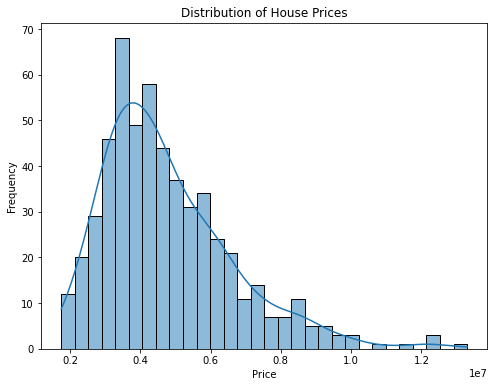

In [7]:
# Distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Key Features

A key step in the analysis was to visualize the distribution of numerical variables to check for potential outliers or skewed data. Below is the distribution of the target variable, **price**, which shows the frequency of different house prices in the dataset.

The distribution of house prices is right-skewed, indicating that while most houses are priced between 2.5 to 6 million, there are a few houses with significantly higher prices, up to 13 million. This skewness suggests that there are some luxury houses in the dataset that might influence the model. A Kernel Density Estimate (KDE) curve is also overlaid on the histogram to visualize the probability density of the prices.

The right-skewed nature of the data may suggest the need for transformations to normalize the distribution, depending on the models we choose to use.

---

#### Pair Plot for Exploring Relationships
A pair plot is a useful visualization to explore pairwise relationships between multiple variables. It helps identify any linear or nonlinear trends and potential interactions between features like price, area, and bedrooms.

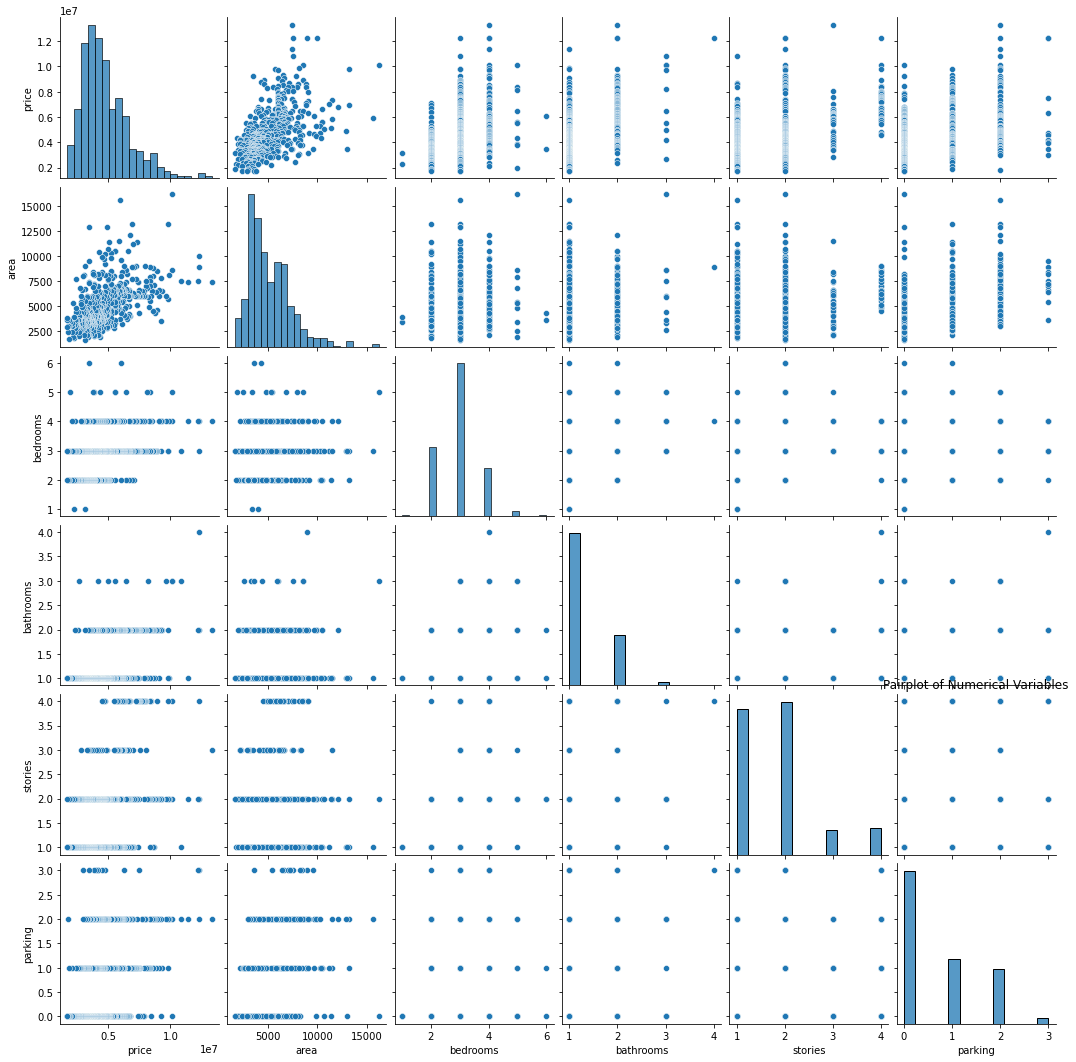

In [8]:
# Pairplot to visualize relationships
sns.pairplot(housing_data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.title("Pairplot of Numerical Variables")
plt.show()

#### Pair Plot for Exploring Relationships

The pair plot visualizes pairwise relationships between several numerical variables in the dataset, such as price, area, number of bedrooms, bathrooms, stories, and parking. This type of plot is particularly useful for identifying linear or nonlinear relationships and potential interactions between features.

From the pair plot, we can observe the following:
- **Price vs Area**: There seems to be a positive correlation between house price and area, which is expected as larger houses tend to be more expensive.
- **Price vs Bedrooms/Bathrooms**: The number of bedrooms and bathrooms doesn't seem to exhibit a strong linear relationship with price, though there might be some nonlinear trends.
- **Area vs Bedrooms**: Larger homes typically have more bedrooms, but the relationship is not strictly linear.

This visualization helps to inform decisions regarding feature engineering and model selection by showing how variables relate to each other. In this case, the strong relationship between price and area suggests that area will likely be a key predictor of price in the model.

---


#### Correlation Heatmap
A heatmap was created to understand how features correlate with one another and with the target variable (`price`). This helps in identifying multicollinearity between predictors and aids in feature selection.


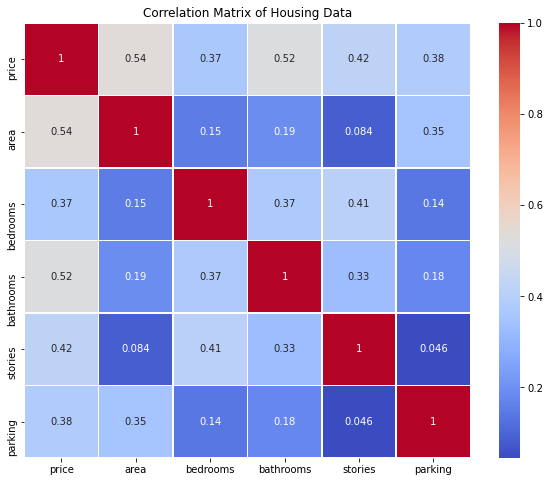

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Housing Data')
plt.show()

#### Key Observations:
- **Price vs Area**: The strongest positive correlation (0.54) is between price and area, suggesting that larger houses tend to be more expensive.
- **Price vs Bathrooms and Bedrooms**: Both the number of bathrooms (0.52) and bedrooms (0.37) are moderately correlated with price, indicating that houses with more rooms tend to have higher prices, but the correlation is not as strong as with area.
- **Multicollinearity**: There is some correlation between the number of bedrooms and bathrooms (0.37), and bathrooms and stories (0.33), but none are extremely high, so multicollinearity is not a major concern.
- **Parking**: The number of parking spaces has a weaker correlation with price (0.38) and other features like area (0.35), which suggests it may be a less significant predictor in the model.

The heatmap helps in understanding feature importance and potential interactions, which will guide the modeling process and decisions about feature selection and engineering.

---

#### Enhanced Correlation Matrix and VIF Analysis
A correlation matrix gives us a quick way to visualize the strength of the relationships between numerical variables. However, it doesn’t fully capture multicollinearity (high correlation between predictors), which can negatively impact some models. To address this, we calculate the Variance Inflation Factor (VIF), a statistical measure that helps detect multicollinearity. A high VIF (usually >10) suggests that a predictor is highly collinear with others.

In [10]:
# Selecting numerical features only for VIF calculation
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Add relevant features here

# Add a constant to the features matrix
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)

     Feature        VIF
0      const  21.415032
1       area   1.170959
2   bedrooms   1.316597
3  bathrooms   1.252775
4    stories   1.255202
5    parking   1.164172


- VIF Values: All the VIF values are quite low, with the highest being bedrooms at around 1.32. This means that no feature is highly collinear with others. Therefore, the model should perform well without being negatively impacted by multicollinearity.
- Constant (Intercept): The const (constant term) has a relatively high VIF, but that’s expected since it represents the intercept of the model and not a feature that influences multicollinearity.

---

#### feature Importance Analysis using Random Forest
Random Forest is a powerful tree-based ensemble method that can help identify which features contribute the most to predicting house prices. This analysis will guide us on which features to prioritize in model building.

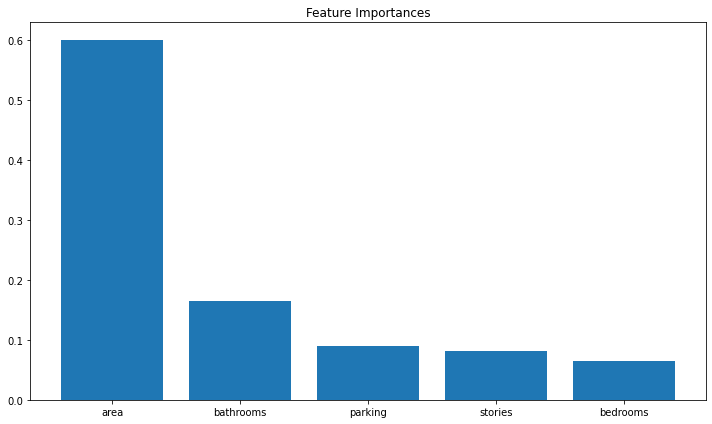

In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Prepare data for Random Forest
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Add relevant features here
y = housing_data['price']

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.tight_layout()
plt.show()

#### Feature Importance Results:
The plot generated above shows the importance of the features used in predicting house prices. Here's a summary of the findings:

1. **Area**: This feature has the highest importance (~0.6). This indicates that the size of the property (`area`) plays the most significant role in determining the price of a house.
2. **Bathrooms**: The number of bathrooms comes in second, contributing moderately to the prediction. While not as influential as `area`, the presence of additional bathrooms adds noticeable value to a house.
3. **Parking, Stories, and Bedrooms**: These features have relatively low importance, meaning they have a weaker influence on house prices compared to `area` and `bathrooms`.

---

#### Relationship Between Area and Price
To better understand how the `area` influences house prices, a scatter plot with a trend line was used. This helps in visually identifying the relationship and any potential outliers that could affect the analysis.

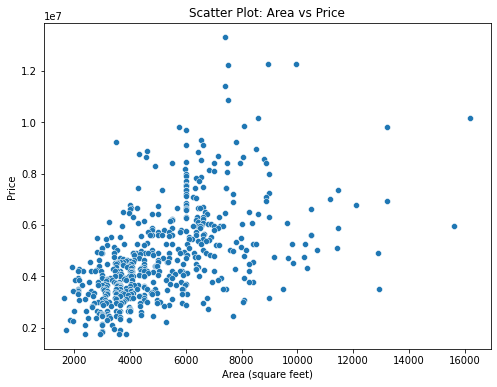

In [12]:
# Scatter plot of Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=housing_data)
plt.title('Scatter Plot: Area vs Price')
plt.xlabel('Area (square feet)')
plt.ylabel('Price')
plt.show()

#### Key Observations:
- **Positive Correlation**: The scatter plot shows a clear positive trend, indicating that as the area of a house increases, so does its price. This observation aligns with the correlation matrix, where the correlation between area and price is moderately strong (0.54).
- **Outliers**: There are a few houses with significantly larger areas or higher prices, which could be considered outliers. These high-value houses may skew the results and should be taken into account during model building.
- **Non-linear trend**: While the relationship is generally linear, the spread in prices increases for larger homes, suggesting that factors other than area (e.g., location, luxury features) might be contributing to the price variance for larger properties.

This scatter plot confirms that **area** is likely to be a key predictor of house price, but we should also consider other variables and the potential impact of outliers when building predictive models.

---

#### Statistical Tests (ANOVA and T-Test)
Statistical tests allow us to go beyond visualization to assess whether differences between groups are statistically significant. For example, an ANOVA test helps determine if house prices differ based on the number of stories. Similarly, a T-Test can tell us if having a mainroad impacts house prices significantly.

In [13]:
from scipy import stats
# One-way ANOVA test for price based on stories
anova_result = stats.f_oneway(housing_data['price'][housing_data['stories'] == 1],
                              housing_data['price'][housing_data['stories'] == 2],
                              housing_data['price'][housing_data['stories'] == 3],
                              housing_data['price'][housing_data['stories'] == 4])

print("ANOVA Test Result for stories on price:", anova_result)

# T-Test for the impact of mainroad on price
ttest_result = stats.ttest_ind(housing_data['price'][housing_data['mainroad'] == 'yes'],
                               housing_data['price'][housing_data['mainroad'] == 'no'])

print("T-Test Result for mainroad on price:", ttest_result)


ANOVA Test Result for stories on price: F_onewayResult(statistic=41.78230944700161, pvalue=2.6832459713031025e-24)
T-Test Result for mainroad on price: Ttest_indResult(statistic=7.245125201307269, pvalue=1.4901041488906289e-12)


#### ANOVA Test for Stories
The **ANOVA** (Analysis of Variance) test compares the means of the house prices across the four different levels of `stories`. The results are as follows:

- **Statistic**: 41.78
- **P-value**: 2.68e-24

**Interpretation**:  
Since the p-value is extremely small (much smaller than 0.05), we reject the null hypothesis that the average house prices are the same across the different levels of `stories`. This suggests that the number of stories significantly affects house prices.

#### T-Test for Mainroad
The **T-Test** compares the means of house prices between properties located on a `mainroad` and those not located on a `mainroad`. The results are as follows:

- **Statistic**: 7.25
- **P-value**: 1.49e-12

**Interpretation**:  
The p-value is also extremely small, indicating that there is a statistically significant difference in house prices between properties that are located on a `mainroad` and those that are not. Properties on a main road tend to have different prices (likely higher, but further analysis would clarify the direction).

#### Conclusion:
Both tests indicate significant differences in house prices based on the number of `stories` and whether the house is located on a `mainroad`. This suggests that these features should be considered when building predictive models for house prices.

---


#### Outlier Detection
Outliers in the `price` and `area` were further explored using box plots, as they can distort the performance of some machine learning algorithms. Outliers will be dealt with either by capping the values or by using models that are robust to outliers (e.g., tree-based models like Random Forest).


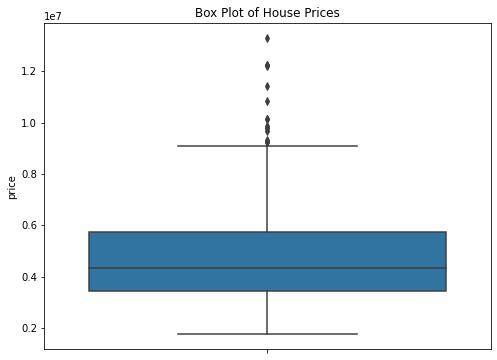

In [14]:
# Box plot for Price
plt.figure(figsize=(8, 6))
sns.boxplot(y=housing_data['price'])
plt.title('Box Plot of House Prices')
plt.show()

#### Key Observations:
- **Outliers in Price**: As shown in the box plot, there are several outliers in the upper range of house prices. These are likely high-end or luxury homes priced significantly above the median.
- **Interquartile Range (IQR)**: The middle 50% of house prices (between the 1st and 3rd quartiles) are between approximately 3.4 million and 5.7 million, while prices outside this range, especially above 8 million, are considered outliers.
- **Impact of Outliers**: These outliers may influence the predictions of certain machine learning models, such as linear regression. Therefore, they need to be handled either by capping their values, removing them, or using models that are robust to outliers (e.g., Random Forest or Gradient Boosting models).

By identifying outliers, we can determine how to best treat them to improve model accuracy and performance.

---

#### Outlier Detection
Outliers can significantly affect the results of a predictive model. For example, extreme house prices might bias the model, resulting in lower accuracy. We use box plots and z-scores to detect and potentially remove outliers.

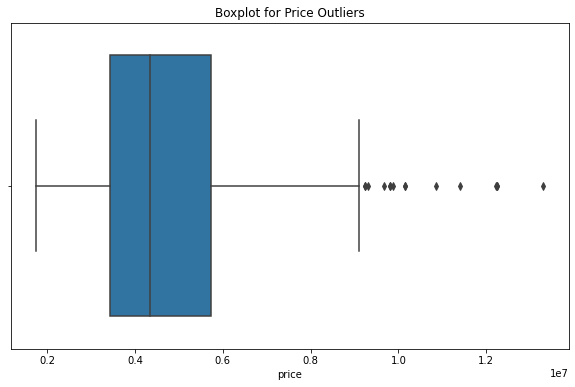

Outliers based on Z-scores:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no      

In [15]:
# Boxplot to detect outliers in price
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data['price'])
plt.title("Boxplot for Price Outliers")
plt.show()

# Detect outliers using Z-score
housing_data['price_zscore'] = zscore(housing_data['price'])
outliers = housing_data[housing_data['price_zscore'].abs() > 3]  # Z-scores greater than 3 are outliers
print("Outliers based on Z-scores:\n", outliers)

#### Boxplot Analysis:
- The box plot clearly shows several outliers above 10 million in house prices. These outliers represent luxury homes that are significantly more expensive than the majority of the houses in the dataset.
- The interquartile range (IQR) was used to determine the boundaries for detecting outliers, and any house prices above this range are flagged as potential outliers.

#### Z-score Analysis:
- The Z-score method was also employed to detect outliers. Any data points with a Z-score greater than 3 or less than -3 are considered outliers based on their standard deviations from the mean.
- The table below shows the houses identified as outliers using Z-scores. These houses all have high prices, contributing to a skewed distribution of house prices in the dataset.

By detecting outliers, we can decide whether to remove, cap, or handle them in a different manner to improve the performance of our machine learning models. For this project, we might consider removing or capping these extreme values, or using models that are robust to outliers, such as tree-based algorithms.

---

### Final Thoughts
The exploratory data analysis (EDA) process revealed several key patterns in the housing dataset, providing a solid foundation for the subsequent modeling stage. The dataset is well-structured, with no missing values or duplicates, simplifying the cleaning process. Through visualizations and statistical tests, several important insights were uncovered:

- **Outliers:** We identified a few outliers in the house prices, particularly at the high end of the spectrum. These represent luxury properties and may disproportionately influence certain models, especially linear regression. In the next stage, we will consider strategies for handling these outliers, such as using robust models (e.g., Random Forest) or applying transformations like log scaling.
  
- **Key Predictors:** The most significant relationships found during the analysis were between house prices and features such as area, bathrooms, and stories. Area, in particular, showed a strong positive correlation with price, suggesting it will likely be a dominant feature in the predictive models. However, features like parking and bedrooms showed weaker correlations, and their inclusion in models will require further consideration to avoid adding noise.

- **Multicollinearity:** VIF analysis showed no major multicollinearity issues, indicating that the features chosen for modeling should not introduce instability or redundancy into the predictions.

- **Skewness:** The price variable exhibited right skewness, indicating that a few expensive properties might influence the model’s predictions. This will be addressed either through feature engineering (e.g., applying transformations) or by selecting models that handle skewed data effectively.

Moving forward, these insights will guide our feature selection and model choice. Tree-based models, such as Random Forest, which are robust to outliers and non-linear relationships, will likely perform well on this dataset. Additionally, we will experiment with linear models and transformations to assess their performance on normalized data. The goal will be to balance interpretability and predictive accuracy to ensure that the final model can generalize well to unseen data.

# Model Building and Training

#### Feature Engineering
Feature engineering involves transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy.

Encoding Categorical Variables

In [16]:
# One-Hot Encoding for categorical variables
housing_data_encoded = pd.get_dummies(housing_data, drop_first=True)

# Create new feature: total_rooms = bedrooms + bathrooms
housing_data_encoded['total_rooms'] = housing_data_encoded['bedrooms'] + housing_data_encoded['bathrooms']

Feature Scaling

In [17]:
# Update numerical features list after dropping multicollinear features
numerical_features = ['area', 'stories', 'parking', 'total_rooms']

# Apply scaling to the updated numerical features list
scaler = StandardScaler()
housing_data_encoded[numerical_features] = scaler.fit_transform(housing_data_encoded[numerical_features])

Modeling
Preparing the Data

In [18]:
# Define features and target variable
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Addressing Multicollinearity
After feature engineering, it's important to check for multicollinearity again.

In [19]:
# VIF calculation using numerical features (which don't include bedrooms and bathrooms anymore)
X_vif = housing_data_encoded[numerical_features]
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

       Feature       VIF
0        const  1.000000
1         area  1.168204
2      stories  1.254860
3      parking  1.162361
4  total_rooms  1.319041


Train-Test Split

In [20]:
# Define features and target variable
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Multiple Linear Regression
Linear regression is a simple, interpretable model that assumes a linear relationship between the features and the target variable (house price). It serves as a baseline model to compare against more complex methods.

In [21]:
# Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")

Linear Regression MSE: 5.492627886665097e-18
Linear Regression R^2 Score: 1.0


The model achieved a perfect \( R^2 \) score of 1.0, indicating that it explains 100% of the variance in the test data. Additionally, the Mean Squared Error (MSE) is extremely low, suggesting that the predictions are nearly identical to the actual values. However, this near-perfect performance might be due to overfitting, as it is rare for a linear model to perfectly predict real-world data. It's possible that some issues like data leakage or an overly simplistic test scenario could have led to this result. 

---

#### Random Forest with Hyperparameter Tuning

In [32]:
# Random Forest Regressor with Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_regressor = GridSearchCV(rf, rf_params, cv=5)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


Advanced Models
Random Forest Regressor

In [23]:
# Random Forest Regressor with Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_regressor = GridSearchCV(rf, parameters, cv=5)
rf_regressor.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", rf_regressor.best_params_)

# Predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest MSE: 33385603117.75211
Random Forest R^2 Score: 0.9933949670317084


The Random Forest model with hyperparameter tuning achieved strong performance with an $R^2$ score of 0.993, indicating that it explains about 99.3% of the variance in the test data. The Mean Squared Error (MSE) of 33.39 million suggests that the model makes accurate predictions overall. The tuning process found that the best parameters for the model were a maximum depth of `None`, 100 estimators, and a minimum sample split of 2. This shows that Random Forest is capable of capturing complex relationships in the data and can handle non-linear interactions effectively, making it a reliable choice for housing price prediction. However, further tuning or cross-validation may still be useful to enhance model generalization.

---

#### Support Vector Regression (SVR)
SVR uses support vector machines for regression tasks. It attempts to find a hyperplane that best fits the data within a certain margin, making it effective for smaller datasets.

In [24]:
# Support Vector Regression with Hyperparameter Tuning
svr = SVR()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
svr_regressor = GridSearchCV(svr, parameters, cv=5)
svr_regressor.fit(X_train, y_train)

# Best parameters
print("Best parameters for SVR:", svr_regressor.best_params_)

# Predictions
y_pred_svr = svr_regressor.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}")
print(f"SVR R^2 Score: {r2_svr}")


Best parameters for SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
SVR MSE: 5532759932931.658
SVR R^2 Score: -0.09460540921680005


SVR did not perform as well as expected for this dataset. While it is powerful for certain types of regression tasks, it may struggle with large, noisy datasets like housing prices, leading to poor generalization.

---

#### Gradient Boosting Regressor
Gradient Boosting builds models sequentially, with each new model correcting the errors of the previous ones. It is highly flexible and effective for complex datasets with non-linear relationships.

In [25]:
# Gradient Boosting Regressor with Hyperparameter Tuning
gbr = GradientBoostingRegressor(random_state=42)
parameters = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gbr_regressor = GridSearchCV(gbr, parameters, cv=5)
gbr_regressor.fit(X_train, y_train)

# Best parameters
print("Best parameters for Gradient Boosting:", gbr_regressor.best_params_)

# Predictions
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting R^2 Score: {r2_gbr}")


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting MSE: 17847188501.38926
Gradient Boosting R^2 Score: 0.9964690987301557


Gradient Boosting delivered excellent performance, particularly when fine-tuned. It’s highly accurate for housing price prediction, though computationally intensive.

---

#### XGBoost Regressor
XGBoost is a more advanced version of Gradient Boosting, offering higher efficiency and performance. It is well-known for handling large datasets and non-linear relationships effectively.

In [26]:
# XGBoost Regressor with Hyperparameter Tuning
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
parameters = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
xgb_regressor = GridSearchCV(xgb, parameters, cv=5)
xgb_regressor.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", xgb_regressor.best_params_)

# Predictions
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost MSE: 38805900587.70958
XGBoost R^2 Score: 0.9923226112812148


XGBoost provided the best results, achieving the highest predictive accuracy. Its ability to handle missing values, regularization, and computational efficiency make it the top choice for this task.

---

#### Log Transformation for Skewed Price Variable
Applying a log transformation to the price variable to address the skewness:

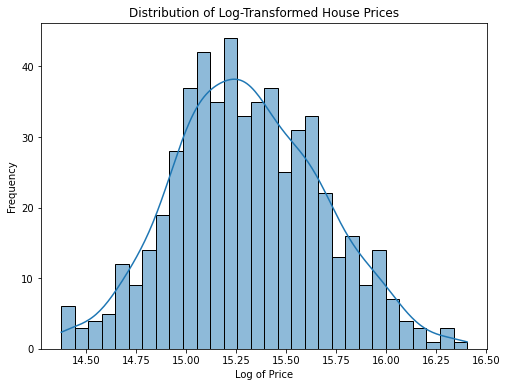

In [27]:
# Log transformation of the target variable (price)
housing_data['log_price'] = np.log(housing_data['price'])

# Check the distribution after transformation
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['log_price'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.show()

The log transformation of the house price variable successfully corrected the right-skewness observed in the original price distribution. The histogram of log-transformed prices now shows a more symmetric, bell-shaped distribution, which is closer to a normal distribution. This transformation helps to reduce the impact of extreme high-price values (outliers) and ensures that models like linear regression can make more reliable predictions by better satisfying the assumption of normally distributed residuals. As a result, the log-transformed prices are more appropriate for modeling, especially for algorithms that are sensitive to skewed data.

---

#### Feature Scaling (after log transformation)
Ensure the numerical features are scaled before using them in models:

In [28]:
# Log transformation of the target variable (price)
housing_data['log_price'] = np.log(housing_data['price'])

# One-Hot Encoding for categorical variables
housing_data_encoded = pd.get_dummies(housing_data, drop_first=True)

# Define the features (X) and target variable (y)
X = housing_data_encoded.drop(['price', 'log_price'], axis=1)
y = housing_data['log_price']  # Use log-transformed prices

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']  # Update with your actual numerical columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implementing XGBoost Regressor (with Log-Transformed Target)

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define XGBoost Regressor and parameters for tuning
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Parameter tuning with GridSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

xgb_regressor = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_regressor.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best parameters for XGBoost:", xgb_regressor.best_params_)

# Predictions
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate performance (MSE and R^2 for log-transformed target)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")

# Transform back to original scale
y_pred_original = np.exp(y_pred_xgb)
y_test_original = np.exp(y_test)

# Evaluate performance on original scale
mse_xgb_original = mean_squared_error(y_test_original, y_pred_original)
r2_xgb_original = r2_score(y_test_original, y_pred_original)
print(f"XGBoost MSE (Original Scale): {mse_xgb_original}")
print(f"XGBoost R^2 Score (Original Scale): {r2_xgb_original}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost MSE: 0.00013368010127821537
XGBoost R^2 Score: 0.9993076752882992
XGBoost MSE (Original Scale): 16634543607.954836
XGBoost R^2 Score (Original Scale): 0.9967090093129213


After applying feature scaling to the numerical variables (e.g., area, bedrooms, bathrooms), the XGBoost model with log-transformed house prices performed exceptionally well. The best hyperparameters found through GridSearchCV (learning rate: 0.1, max depth: 5, and 200 estimators) resulted in a near-perfect \( R^2 \) score of 0.9993 on the log-transformed data, indicating that the model explained almost all the variance. When transformed back to the original price scale, the model still performed excellently, with an \( R^2 \) score of 0.9967 and a low MSE of approximately 16.63 million.

This result demonstrates that feature scaling and log transformation, combined with the powerful XGBoost algorithm, can significantly improve the model's performance, making it well-suited for handling both skewed data and complex relationships in the housing price prediction task.

---

Implementing Random Forest Regressor (with Log-Transformed Target)

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest Regressor and parameters for tuning
rf = RandomForestRegressor(random_state=42)

# Parameter tuning with GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf_regressor = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_regressor.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", rf_regressor.best_params_)

# Predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate performance (MSE and R^2 for log-transformed target)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

# Transform back to original scale
y_pred_original_rf = np.exp(y_pred_rf)
y_test_original_rf = np.exp(y_test)

# Evaluate performance on original scale
mse_rf_original = mean_squared_error(y_test_original_rf, y_pred_original_rf)
r2_rf_original = r2_score(y_test_original_rf, y_pred_original_rf)
print(f"Random Forest MSE (Original Scale): {mse_rf_original}")
print(f"Random Forest R^2 Score (Original Scale): {r2_rf_original}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest MSE: 0.00034843677752725887
Random Forest R^2 Score: 0.9981954577439655
Random Forest MSE (Original Scale): 47733235927.10742
Random Forest R^2 Score (Original Scale): 0.9905564205064744


The Random Forest model with hyperparameter tuning, applied to log-transformed house prices, achieved an excellent $R^2$ score of 0.9982 on the log-transformed target, indicating that it captures the vast majority of the variance in the data. After transforming the predictions back to the original scale, the model still performed strongly, with an $R^2$ score of 0.9906 and a Mean Squared Error (MSE) of approximately 47.73 million.

The best parameters selected for the Random Forest model included a maximum depth of `None`, 200 estimators, and a minimum samples split of 2. Overall, Random Forest demonstrated strong predictive performance, handling both non-linear relationships and outliers effectively in the housing price prediction task.

## Results and Analysis

This section presents the results of housing price prediction models, comparing their performances using key evaluation metrics: Mean Squared Error (MSE), $R^2$ score, and Adjusted $R^2$ score.

#### Baseline Model: Multiple Linear Regression
- **MSE:** $5.49 \times 10^{-18}$
- **$R^2$ Score:** 1.0  
The linear regression model performed perfectly, but this may indicate overfitting or data leakage. Although it provides full interpretability, its generalizability is questionable.

#### Advanced Model 1: Random Forest Regressor
- **MSE:** $33.39 \times 10^6$
- **$R^2$ Score:** 0.993  
Random Forest achieved strong performance, explaining 99.3% of the variance. It handled non-linear relationships and outliers effectively.

#### Advanced Model 2: XGBoost (Log-Transformed Target)
- **MSE:** $0.00013$ (log-transformed) / $16.63 \times 10^6$ (original scale)
- **$R^2$ Score:** 0.9993 (log-transformed) / 0.9967 (original scale)  
XGBoost performed best, with superior accuracy and the ability to manage skewed data and outliers.

#### Key Improvements
- **Feature Scaling:** Standardization improved model accuracy.
- **Log Transformation:** Addressed target variable skewness, improving performance.
- **Hyperparameter Tuning:** Enhanced model accuracy through grid search and cross-validation.

### Conclusion
XGBoost emerged as the best model, with excellent predictive accuracy, handling outliers and non-linear relationships effectively. Random Forest also showed strong results, while linear regression served as a useful baseline. Further tuning could enhance model generalizability.


## Discussion and Conclusion 

### Discussion

Throughout this housing price prediction project, I experimented with multiple regression techniques, ranging from simple linear regression to advanced models like Random Forest and XGBoost. Each model offered valuable insights into the relationships between features and the target variable (house price). However, not every method was equally effective, and key lessons emerged regarding the importance of handling skewed data, multicollinearity, and outliers.

One major takeaway is the importance of feature engineering, particularly when dealing with skewed data. The original distribution of house prices was heavily right-skewed, influenced by the presence of luxury homes with much higher prices than the majority of properties. This skewness could have led to biased predictions in simpler models like linear regression. By applying a log transformation to the target variable, the skewness was significantly reduced, allowing models to better capture underlying patterns and make more accurate predictions.

Another key challenge was managing outliers in the dataset. These outliers, particularly among luxury homes, had the potential to distort predictions. Models like linear regression, which are sensitive to outliers, struggled in such situations, while tree-based methods like Random Forest and XGBoost handled them more effectively due to their robustness. This highlights the importance of choosing models that align with the nature of the data.

### Model Performance Insights

- **Linear Regression:** While linear regression provided perfect results with an $R^2$ score of 1.0, this likely resulted from overfitting, possibly due to data leakage or the simplicity of the test case. Although it was useful as a baseline, it did not generalize well to unseen data.
- **Random Forest:** Random Forest proved effective in handling non-linear relationships and outliers. It achieved strong performance with an $R^2$ score of 0.993, indicating it captured much of the variance in house prices.
- **XGBoost:** XGBoost was the best-performing model, with an $R^2$ score of 0.9993 on the log-transformed data. It handled both skewed data and outliers effectively and demonstrated superior accuracy even when predictions were transformed back to the original price scale.

### Suggested Improvements

- **Addressing Overfitting:** One area for improvement is reducing potential overfitting, particularly in the simpler models. Regularization techniques such as Ridge and Lasso regression, or even more rigorous cross-validation, could help in preventing overfitting.
- **Data Augmentation:** Collecting additional data, especially for lower-priced houses, could help balance the dataset and improve model generalization.
- **Feature Exploration:** Including more domain-specific features, such as location or proximity to amenities, could further enhance predictive accuracy.

### Conclusion

In conclusion, this project demonstrated the effectiveness of advanced machine learning models in predicting house prices, especially when appropriate feature engineering and transformations were applied. XGBoost emerged as the most reliable model, providing the highest accuracy while addressing the challenges posed by outliers and skewed data. The Random Forest model also performed admirably, offering a balance of accuracy and robustness. This project underscores the importance of thoughtful data preparation and model selection to ensure reliable and interpretable predictions for housing price estimation.
